In [1]:
%reload_ext autoreload
%autoreload 2

In [13]:
import scipy.io
import numpy as np
from utils import get_attr_dataloader,get_reid_dataloader,show_grid,get_infinite_loader,get_infinite_zip_loader,PedestrianAttributeDataset
from decoder.pos_emb import PositionEmbeddingSine

import torch
import torchvision.utils as vutils


In [8]:
train_attr = get_attr_dataloader(annotation_path="../../projectcv/pa-100k/annotation/annotation.mat",image_folder="../../projectcv/pa-100k/release_data/",split = "Train",batch_size =2)

In [14]:
train_dataset = PedestrianAttributeDataset(annotation_path="../../projectcv/pa-100k/annotation/annotation.mat",image_folder="../../projectcv/pa-100k/release_data/")

In [19]:
annotations =scipy.io.loadmat("../../projectcv/pa-100k/annotation/annotation.mat")
classes = annotations["attributes"]

In [20]:
classes

array([[array(['Female'], dtype='<U6')],
       [array(['AgeOver60'], dtype='<U9')],
       [array(['Age18-60'], dtype='<U8')],
       [array(['AgeLess18'], dtype='<U9')],
       [array(['Front'], dtype='<U5')],
       [array(['Side'], dtype='<U4')],
       [array(['Back'], dtype='<U4')],
       [array(['Hat'], dtype='<U3')],
       [array(['Glasses'], dtype='<U7')],
       [array(['HandBag'], dtype='<U7')],
       [array(['ShoulderBag'], dtype='<U11')],
       [array(['Backpack'], dtype='<U8')],
       [array(['HoldObjectsInFront'], dtype='<U18')],
       [array(['ShortSleeve'], dtype='<U11')],
       [array(['LongSleeve'], dtype='<U10')],
       [array(['UpperStride'], dtype='<U11')],
       [array(['UpperLogo'], dtype='<U9')],
       [array(['UpperPlaid'], dtype='<U10')],
       [array(['UpperSplice'], dtype='<U11')],
       [array(['LowerStripe'], dtype='<U11')],
       [array(['LowerPattern'], dtype='<U12')],
       [array(['LongCoat'], dtype='<U8')],
       [array(['Trousers'], d

In [9]:
image,label = next(iter(train_attr))

In [10]:
image.shape

torch.Size([2, 3, 276, 212])

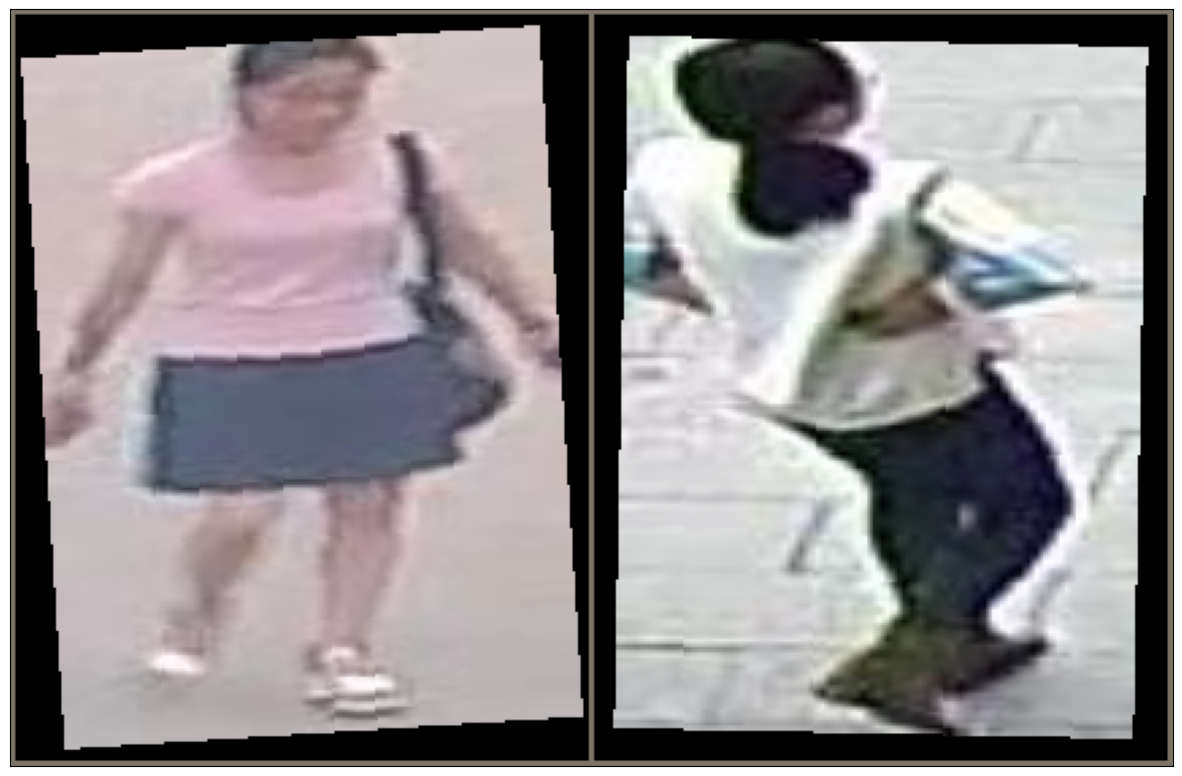

In [11]:
grid = vutils.make_grid(image,nrow =4//2)
show_grid(grid)

In [21]:
# Market 1501
root_dir='../../projectcv/Market-1501'

In [22]:
train_dl,val_dl = get_reid_dataloader(root_dir,batch_size =2)

# Now, you can use this dataloader to train a model with triplet loss


In [23]:
a,p,n = next(iter(train_dl))

In [24]:
a.shape

torch.Size([2, 3, 276, 212])

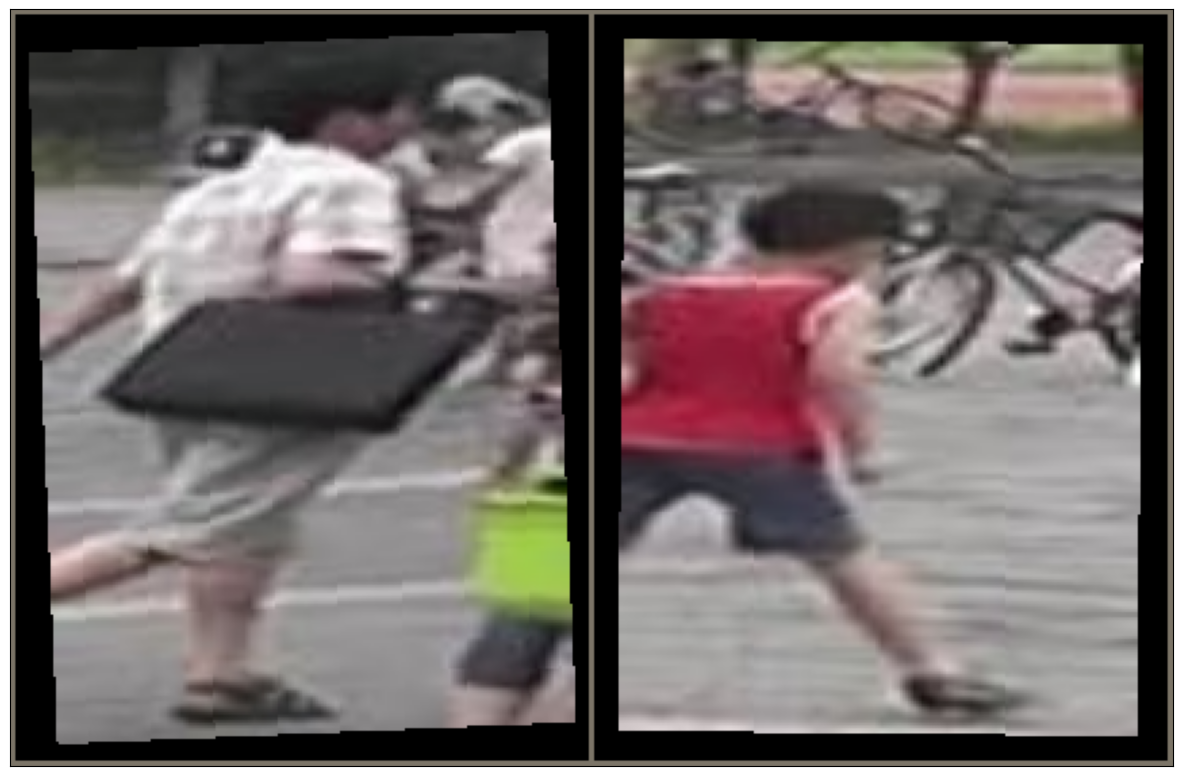

In [25]:
grid = vutils.make_grid(a,nrow =4//2)
show_grid(grid)

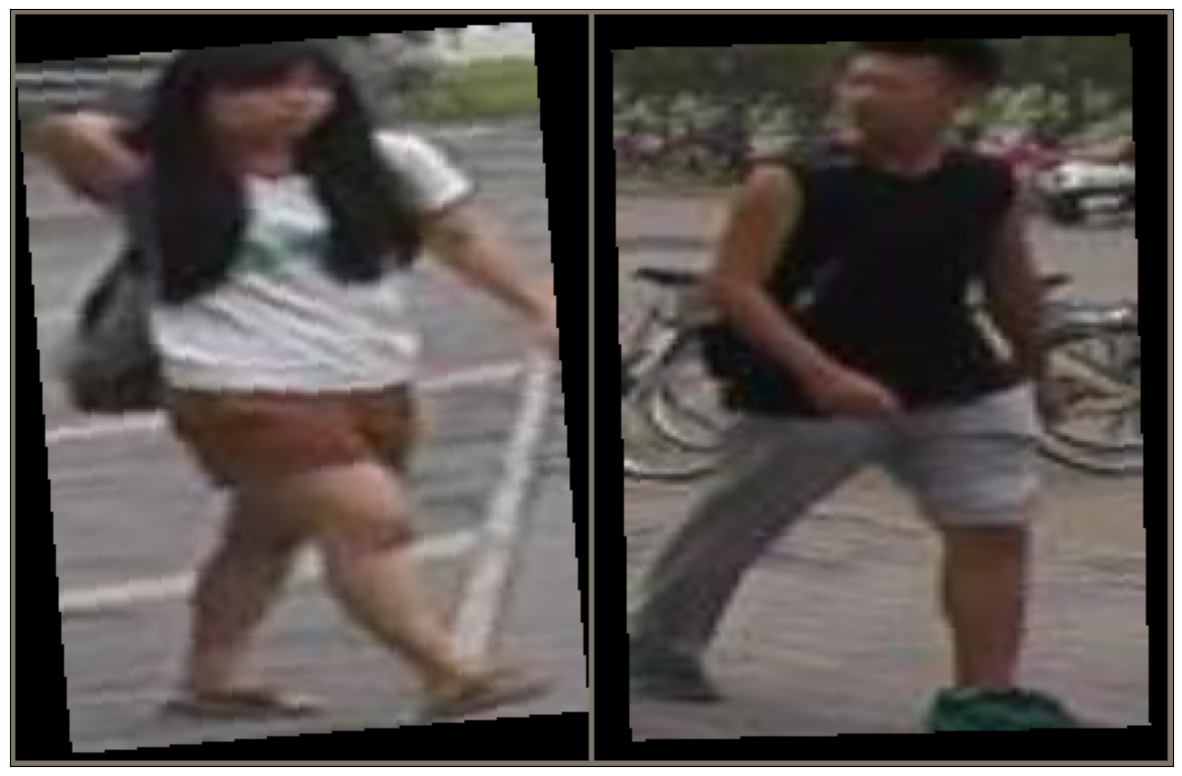

In [26]:
grid = vutils.make_grid(n,nrow =4//2)
show_grid(grid)

In [40]:
train_attr = get_infinite_loader(train_attr)
train_dl = get_infinite_loader(train_dl)
cdl = get_infinite_zip_loader(train_attr,train_dl)

In [47]:
batch= next(cdl)

In [48]:
images,labels = batch[0]

In [49]:
images.shape

torch.Size([2, 3, 276, 212])

In [50]:
a,p,n = batch[1]

In [51]:
a.shape

torch.Size([2, 3, 276, 212])

In [1]:
%load_ext tensorboard

In [2]:
%tensorboard --logdir tf_logs